# Predicting the Charges

## Importing the basic required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

### Reading the data from csv file

In [2]:
data = pd.read_csv('insurance.csv')

### Analyze data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
data.shape

(1338, 7)

### Visulaize data

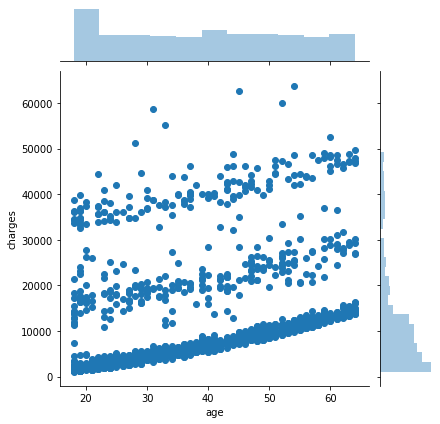

In [9]:
sns.jointplot(x='age',y='charges',data=data)

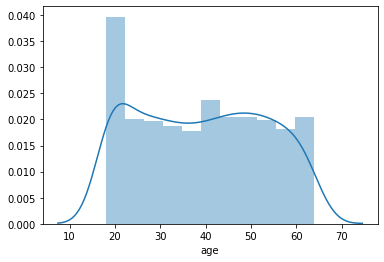

In [10]:
sns.distplot(data['age'])

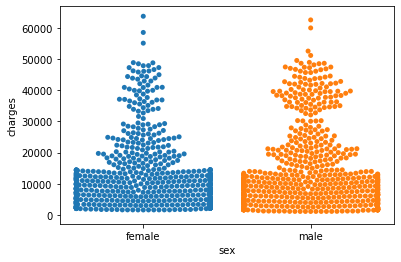

In [11]:
sns.swarmplot(x='sex',y='charges',data=data)

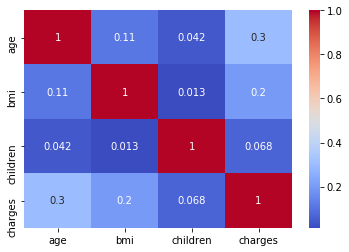

In [12]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

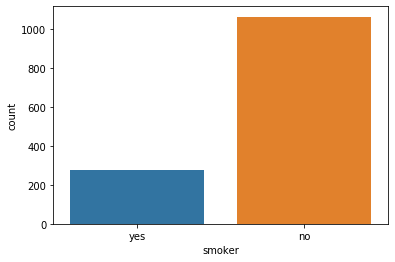

In [13]:
sns.countplot(data['smoker'])

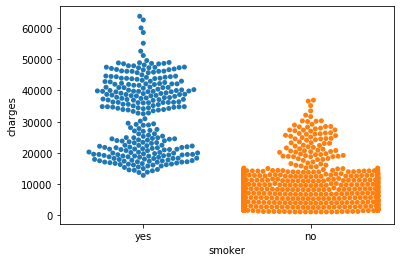

In [15]:
sns.swarmplot(x='smoker',y='charges',data=data)

### Cleaning the data

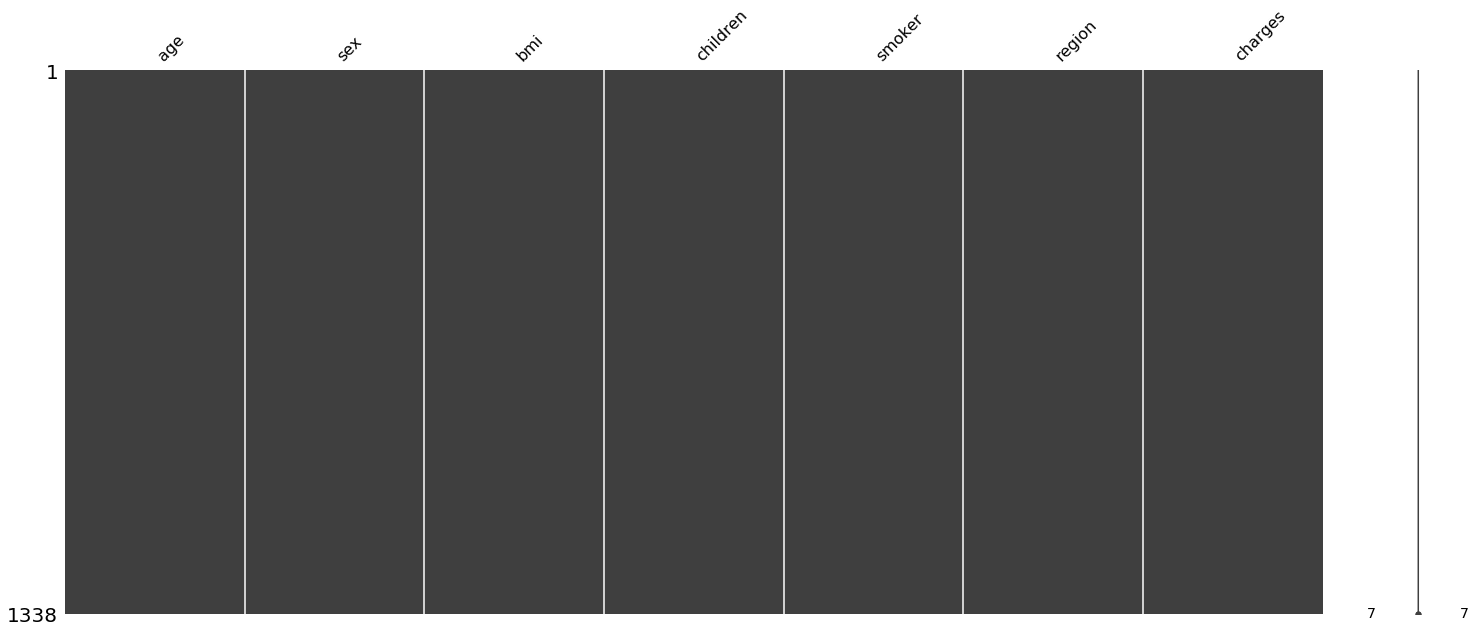

In [16]:
ms.matrix(data)

### Categorical Value Converison

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
x = data.drop('charges',axis=1)
y = data['charges']

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

### Training dataset

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [25]:
X_train.shape

(936, 11)

In [26]:
X_test.shape

(402, 11)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linearRegression = LinearRegression()

In [29]:
linearRegression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###  Predicting the model on the test set


In [30]:
Y_pred_test = linearRegression.predict(X_test)

In [31]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Results

In [32]:
Y_test = np.array(Y_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_test.reshape(len(Y_pred_test),1),Y_test.reshape(len(Y_test),1)),1))


[[ 1.08e+04  6.08e+03]
 [ 2.84e+03  2.46e+03]
 [ 1.04e+04  2.55e+04]
 [ 2.71e+04  3.44e+04]
 [ 6.24e+03  6.99e+03]
 [ 2.77e+02  1.70e+03]
 [ 1.51e+04  1.32e+04]
 [ 4.33e+03  4.34e+03]
 [ 1.11e+04  9.78e+03]
 [ 7.21e+03  4.84e+03]
 [ 8.18e+03  5.37e+03]
 [ 1.06e+04  9.63e+03]
 [ 6.39e+03  4.08e+03]
 [ 1.25e+04  3.03e+04]
 [ 3.08e+04  2.12e+04]
 [ 3.69e+04  4.43e+04]
 [ 1.06e+04  8.41e+03]
 [ 3.00e+03  4.39e+03]
 [ 1.49e+04  1.06e+04]
 [ 1.36e+04  2.06e+04]
 [ 2.98e+04  2.02e+04]
 [ 7.24e+03  2.62e+04]
 [ 1.29e+04  9.39e+03]
 [ 5.81e+03  1.37e+04]
 [ 3.12e+02  1.70e+03]
 [ 2.49e+04  1.69e+04]
 [ 1.20e+04  1.43e+04]
 [ 2.71e+04  3.42e+04]
 [ 3.80e+04  4.62e+04]
 [ 4.39e+03  2.90e+03]
 [ 6.10e+03  3.96e+03]
 [ 7.14e+03  7.62e+03]
 [ 3.48e+03  1.64e+03]
 [ 2.66e+03  1.44e+04]
 [ 5.97e+03  1.63e+03]
 [ 5.87e+03  2.03e+04]
 [ 4.89e+02  1.52e+03]
 [ 1.26e+04  1.16e+04]
 [ 1.39e+04  2.70e+04]
 [ 1.07e+04  1.19e+04]
 [ 1.02e+04  3.52e+04]
 [ 9.47e+03  8.70e+03]
 [ 1.49e+04  1.24e+04]
 [ 1.03e+04

### Calculating Single Value

In [33]:
print(linearRegression.predict([[1,0,0,0,0,1,0,1,19,22.2,0]]))

[23691.67]


### Calculating Coefficents and slope 

In [34]:
a = linearRegression.coef_
print(a)
b = pd.DataFrame(a)
print(b)

[   325.94    495.77   -267.     -554.71 -11731.78  11731.78    -26.07
     26.07    241.28    367.19    494.29]
               0
0     325.941699
1     495.767976
2    -267.003287
3    -554.706388
4  -11731.782434
5   11731.782434
6     -26.067732
7      26.067732
8     241.278787
9     367.188753
10    494.290617


In [35]:
print(linearRegression.intercept_)

-1128.0129042153749


### Calculating R-squared score

In [36]:
from sklearn.metrics import r2_score

In [39]:
r2_score(Y_test,Y_pred_test)

0.7602196966782768